# Disease Prediction using Machine Learning

- Disease:       Malaria
- Data:          Haematological data
- Classifier:    Random Forest
- Python Libraries
    - numpy
    - scipy
    - pandas
    - matplotlib
    - seaborn
    - scikit-learn

This project is based on this:
Morang’a, C.M., Amenga–Etego, L., Bah, S.Y. et al. Machine learning approaches classify clinical malaria outcomes based on haematological parameters. BMC Med 18, 375 (2020). https://doi.org/10.1186/s12916-020-01823-3

<a href="https://static-content.springer.com/esm/art%3A10.1186%2Fs12916-020-01823-3/MediaObjects/12916_2020_1823_MOESM2_ESM.xlsx"> Download Dataset

### Import libraries for the analysis 

In [1]:
import pandas as pd        #read,explore & clean data
import numpy as np         # data manipulation
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # data visualization

### Read the data

In [10]:
#set path to the data file.
data_file='C:/Users/ACER/Downloads/data_file.csv'

In [12]:
#read the data with pandas
dataframe=pd.read_csv(data_file)

### Explore, clean and preprocess the data 

In [14]:
#find the number of rows and columns in the dataframe
dataframe.shape

(2207, 34)

In [28]:
#get the first n rows in the dataframe
dataframe.head(n=10)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
5,CCS20183,yes,Navrongo,2003,NaN,Yes,38.1,Not Known / Missing entry,NaN,Positive,...,383.0,4.9,7.2,66.6,21.6,11.8,6.0,1.8,1.0,18.7
6,CCS20249,yes,Navrongo,2004,NaN,Yes,39.7,Not Known / Missing entry,NaN,Positive,...,297.0,14.1,6.6,77.0,18.2,4.8,19.4,4.5,1.1,16.5
7,CCS20260,yes,Navrongo,2004,NaN,Yes,36.0,Not Known / Missing entry,NaN,Positive,...,103.0,14.2,7.3,43.0,50.2,6.8,2.5,2.7,0.3,16.5
8,CCS20273,yes,Navrongo,2003,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,41.0,10.0,7.0,58.6,23.3,18.1,6.9,2.6,2.0,16.9
9,CCS20292,yes,Navrongo,2004,NaN,Yes,38.7,Not Known / Missing entry,NaN,Positive,...,97.0,13.6,6.6,63.5,21.0,15.5,5.5,1.7,1.2,15.2


In [16]:
# list the column names
dataframe.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [32]:
#obtain some information about the data 
#i.e. columns,datatypes,missing values,etc
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [34]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'
#meaning we will subset the data from column 16 - the last column
subset=dataframe.iloc[:,16:]

In [36]:
subset.shape

(2207, 18)

In [40]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   object 
 1   wbc_count               2207 non-null   float64
 2   rbc_count               2207 non-null   float64
 3   hb_level                2207 non-null   float64
 4   hematocrit              2207 non-null   float64
 5   mean_cell_volume        2207 non-null   float64
 6   mean_corp_hb            2204 non-null   float64
 7   mean_cell_hb_conc       2205 non-null   float64
 8   platelet_count          2198 non-null   float64
 9   platelet_distr_width    2175 non-null   float64
 10  mean_platelet_vl        2190 non-null   float64
 11  neutrophils_percent     2207 non-null   float64
 12  lymphocytes_percent     2207 non-null   float64
 13  mixed_cells_percent     2207 non-null   float64
 14  neutrophils_count       2195 non-null   

In [42]:
#Check the mising data. We are interested in how many missing data are present in each column
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [44]:
# handling missing values
# drop / remove all rows with missing values
subset.dropna(inplace=True)

In [46]:
subset.shape

(2156, 18)

In [48]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [ ]:
#Let us get the different malaria outcomes. 
#The outcomes will be our labels/classes in the data

In [50]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [52]:
labels=pd.Categorical(subset['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [54]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [56]:
#class distribution
subset['Clinical_Diagnosis'].value_counts()

Clinical_Diagnosis
Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: count, dtype: int64

<Axes: xlabel='Clinical_Diagnosis'>

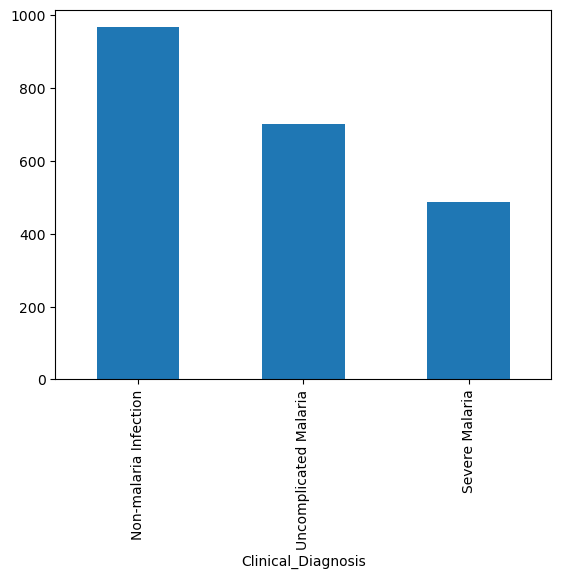

In [58]:
# plot a bar chat to display the class distribution
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [62]:
#descriptive statistics on the data
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [66]:
#check the correlation for the features
# Select only numeric columns
numeric_subset = subset.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_subset.corr()
print(correlation_matrix)


                        wbc_count  rbc_count  hb_level  hematocrit  \
wbc_count                1.000000  -0.217584 -0.283881   -0.261736   
rbc_count               -0.217584   1.000000  0.896557    0.922294   
hb_level                -0.283881   0.896557  1.000000    0.968644   
hematocrit              -0.261736   0.922294  0.968644    1.000000   
mean_cell_volume        -0.150900  -0.017848  0.286931    0.279029   
mean_corp_hb            -0.084770  -0.348335  0.023659   -0.101461   
mean_cell_hb_conc        0.066981  -0.497615 -0.302304   -0.479766   
platelet_count           0.122330   0.409424  0.353828    0.387830   
platelet_distr_width     0.022260   0.001756  0.068770    0.091718   
mean_platelet_vl        -0.100716   0.284809  0.248323    0.285169   
neutrophils_percent      0.093870   0.077574  0.162289    0.119252   
lymphocytes_percent     -0.090940  -0.073216 -0.158665   -0.113198   
mixed_cells_percent     -0.057664  -0.056070 -0.093352   -0.083365   
neutrophils_count   

<Axes: >

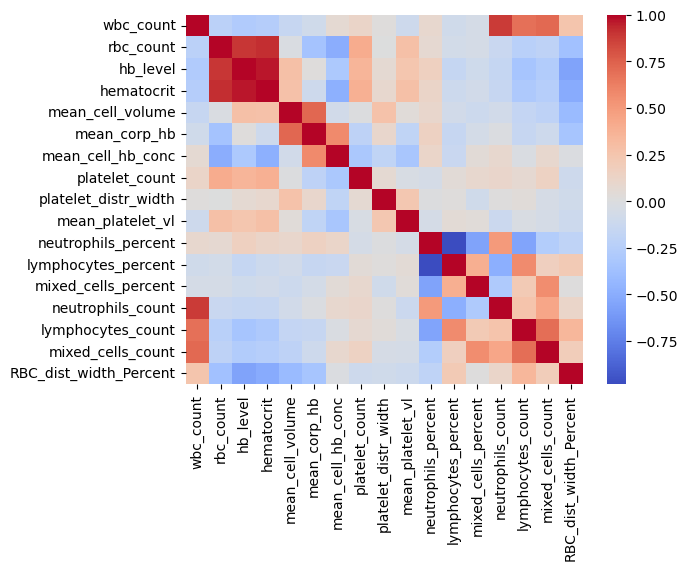

In [70]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(correlation_matrix,cmap='coolwarm')

## Data Preprocessing

In [72]:
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [74]:
X.shape

(2156, 17)

In [76]:
y.shape

(2156,)

In [ ]:
#encode the labels. 
#This is required by scikit learn when performing supervised learning

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [96]:
y_encoded[500:530]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2])

In [98]:
y[500:530]

538    Uncomplicated Malaria
539    Uncomplicated Malaria
540    Uncomplicated Malaria
541    Uncomplicated Malaria
542    Uncomplicated Malaria
543    Uncomplicated Malaria
544    Uncomplicated Malaria
545    Uncomplicated Malaria
546    Uncomplicated Malaria
547    Uncomplicated Malaria
548    Uncomplicated Malaria
549    Uncomplicated Malaria
550    Uncomplicated Malaria
551    Uncomplicated Malaria
552    Uncomplicated Malaria
553    Uncomplicated Malaria
554    Uncomplicated Malaria
555    Uncomplicated Malaria
556    Uncomplicated Malaria
557    Uncomplicated Malaria
558    Non-malaria Infection
559    Uncomplicated Malaria
560    Uncomplicated Malaria
561    Uncomplicated Malaria
562    Non-malaria Infection
565    Uncomplicated Malaria
566    Uncomplicated Malaria
567    Non-malaria Infection
568    Uncomplicated Malaria
569    Uncomplicated Malaria
Name: Clinical_Diagnosis, dtype: object

In [100]:
classes=label_encoder.classes_
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

## Split data into train and test sets

In [ ]:
# train test ratio 80:20

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.30)

In [215]:
X_train.shape

(1509, 17)

In [217]:
y_train.shape

(1509,)

In [219]:
X_test.shape

(647, 17)

In [221]:
y_test.shape

(647,)

### Standardization of the data

In [ ]:
# scale data between 0 and 1

In [223]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.transform(X_test)

In [225]:
X_train_scaled[0,0]

0.2153558052434457

In [231]:
X_train.iloc[0,0]

12.0

### Training Phase

In [ ]:
#create random forest classifier

In [233]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

### Testing phase

In [ ]:
# model prediction on the test set

In [235]:
y_pred=clf.predict(X_test_scaled)

In [237]:
y_pred[0:10]

array([0, 0, 2, 0, 0, 1, 0, 0, 0, 0])

In [239]:
y_test[0:10]

array([0, 0, 2, 0, 0, 1, 2, 0, 0, 0])

In [241]:
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

### Evaluating the model



The following metrics will be used
- accuracy
- f1 score
- recall
- precision
- confusion matrix

In [243]:
# import the metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [245]:
#balanced accuracy
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced accuracy:',balanced_accuracy)

balanced accuracy: 0.85


In [247]:
#f1score
f1score=f1_score(y_test,y_pred,average='weighted')
f1score=round(f1score,2)
print('f1score:',f1score)

f1score: 0.84


In [249]:
#precision 
precision=precision_score(y_test,y_pred,average='weighted')
precision=round(precision,2)
print('precision:',precision)

precision: 0.85


In [251]:
#recall
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall:',recall)

recall: 0.85


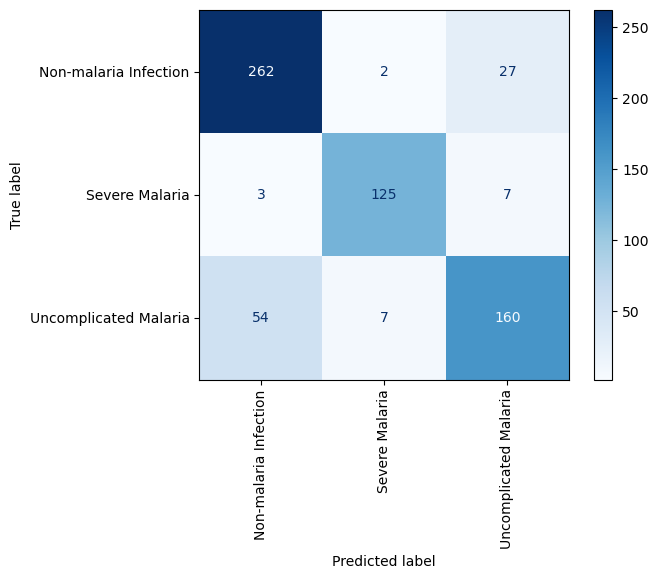

In [253]:
cm = confusion_matrix(y_test, y_pred)
#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# Plot the confusion matrix with specified options
disp.plot(cmap='Blues', xticks_rotation='vertical')
# Show the plot
plt.show()